In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Importamos los datos a usar
path = 'diabetes.csv'
#features = ['age', 'sex', 'trestbps','chol','fbd','restecg','thalach','exang','oldpeak','slope','ca','thal'] 
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.Outcome = df.Outcome.replace({1: "positivo", 0: "negativo"}) ##cambiamos 1 a positivo y 0 a negativo

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,positivo
1,1,85,66,29,0,26.6,0.351,31,negativo
2,8,183,64,0,0,23.3,0.672,32,positivo
3,1,89,66,23,94,28.1,0.167,21,negativo
4,0,137,40,35,168,43.1,2.288,33,positivo


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,negativo
764,2,122,70,27,0,36.8,0.340,27,negativo
765,5,121,72,23,112,26.2,0.245,30,negativo
766,1,126,60,0,0,30.1,0.349,47,positivo
767,1,93,70,31,0,30.4,0.315,23,negativo


In [6]:
#Se usa StandardScaler para estandarizar las característicasde los datos en escala de unidad media = 0 y varianza = 1

from sklearn.preprocessing import StandardScaler 
features = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'] 
##se separan las caracteristicas y el targen en X y y
x = df.loc[:, features].values

y = df.loc[:,['Outcome']].values



In [7]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
x = StandardScaler().fit_transform(x)

In [9]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
y

array([['positivo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['negativo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['negativo'],
       ['negativo'],
       ['negativo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['negativo'],
       ['negativo'],
       ['negativo'],
       ['negativo'],
       ['positivo'],
       ['positivo'],
       ['positivo'],
       ['negativo'],
       ['negativo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['positivo'],
       ['negativo'],
       ['nega

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)


In [12]:
principalComponents

array([[ 1.06850273,  1.23489499],
       [-1.12168331, -0.73385167],
       [-0.39647671,  1.59587594],
       ...,
       [-0.28347525,  0.09706503],
       [-1.06032431,  0.83706234],
       [-0.83989172, -1.15175485]])

In [13]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Componente 1', 'Componente 2'])

In [14]:
finalDf = pd.concat([principalDf, df[['Outcome']]], axis = 1) #juntamos las dos tablas

In [15]:
finalDf

,Componente 1,Componente 2,Outcome
0,1.068503,1.234895,positivo
1,-1.121683,-0.733852,negativo
2,-0.396477,1.595876,positivo
3,-1.115781,-1.271241,negativo
4,2.359334,-2.184819,positivo
...,...,...,...
763,1.562085,1.923150,negativo
764,-0.100405,-0.614181,negativo
765,-0.283475,0.097065,negativo
766,-1.060324,0.837062,positivo


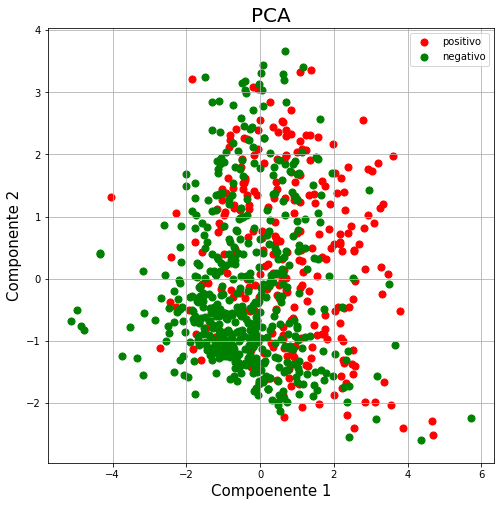

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Compoenente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['positivo', 'negativo']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Componente 1']
               , finalDf.loc[indicesToKeep, 'Componente 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()